In [88]:
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.patches as mpatches

from scipy.stats import gaussian_kde
from scipy.optimize import minimize_scalar

from numpy.polynomial.chebyshev import Chebyshev
import numpy as np

from rich.console import Console
from rich.table import Table

from multiprocessing import Pool, cpu_count

import fastkde

import constants, functions

n_omega = 500
n_sigma = 600
n_gamma = 500

omega_vals = np.asarray(np.linspace(0.01, 0.9, n_omega))
sigma_vals = np.asarray(np.linspace(0.01, 1.4, n_sigma))
gamma_vals = np.asarray(np.linspace(0.01, 0.9, n_gamma))

chi2_grid = functions.chi2(omega_vals= omega_vals, sigma_vals=sigma_vals, gamma_vals=gamma_vals)

(np.float64(0.1), np.float64(0.06707414829659318)) 8.214477548326304


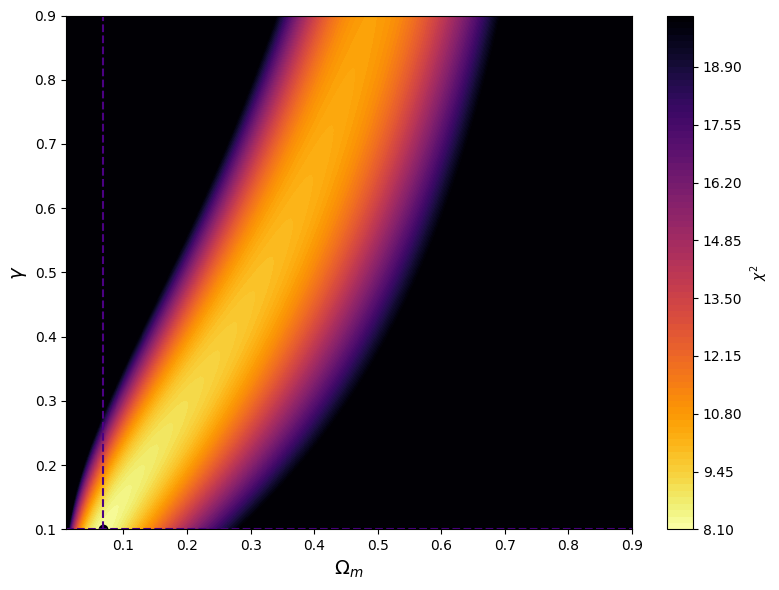

In [98]:
def display(chi2_grid, axis):
    chi2_slice = np.min(chi2_grid, axis=axis)
    chi2_min_slice_clipped = np.clip(chi2_slice, a_min=None, a_max=20)

    if axis == 0:
        ax1, ax2 = np.meshgrid(gamma_vals, sigma_vals)
        xlabel = r'$\gamma$'
        ylabel = r'$\sigma_8$'
    elif axis == 1:
        ax1, ax2 = np.meshgrid(gamma_vals, omega_vals)
        xlabel = r'$\Omega_m$'
        ylabel = r'$\gamma$'
    elif axis == 2:
        ax1, ax2 = np.meshgrid(sigma_vals, omega_vals)
        xlabel = r'$\Omega_m$'
        ylabel = r'$\sigma_8$'

    plt.figure(figsize=(8, 6))
    contour = plt.contourf(ax2, ax1, chi2_min_slice_clipped, levels=100, cmap='inferno_r')
    plt.colorbar(contour, label=r'$\chi^2$')

    max_idx = np.unravel_index(np.argmin(chi2_min_slice_clipped), chi2_min_slice_clipped.shape)
    x_min = ax1[max_idx]
    y_min = ax2[max_idx]

    print((x_min, y_min), chi2_min_slice_clipped[max_idx])

    plt.plot(y_min, x_min, 'ko', label='Best-fit')
    plt.axhline(x_min, color='indigo', linestyle='--')
    plt.axvline(y_min, color='indigo', linestyle='--')

    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.tight_layout()
    plt.show()

display(chi2_grid, 1)

(np.int64(188), np.int64(304)) 0.7597662771285475 0.34531062124248496 9.963223458976293


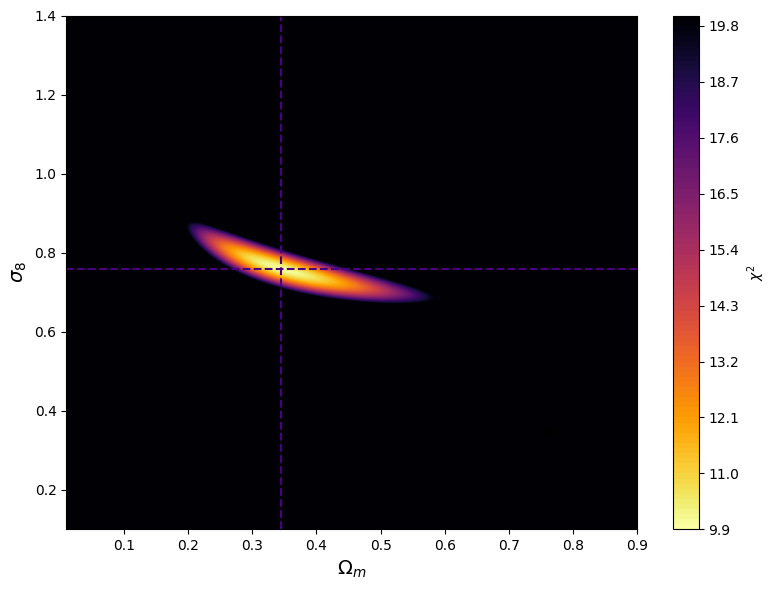

In [69]:
chi2_slice = chi2_grid[:, :, gamma_index]

chi2_min_slice_clipped = np.clip(chi2_slice, a_min=None, a_max=20)

Omega, Sigma = np.meshgrid(sigma_vals, omega_vals)

plt.figure(figsize=(8, 6))
contour = plt.contourf(Sigma, Omega, chi2_min_slice_clipped, levels=100, cmap='inferno_r')
plt.colorbar(contour, label=r'$\chi^2$')

max_idx = np.unravel_index(np.argmin(chi2_min_slice_clipped), chi2_min_slice_clipped.shape)
x_min = Omega[max_idx]
y_min = Sigma[max_idx]

print(max_idx, Omega[max_idx], Sigma[max_idx], chi2_min_slice_clipped[max_idx])

plt.plot(x_min, y_min, 'ko', label='Best-fit')
plt.axhline(x_min, color='indigo', linestyle='--')
plt.axvline(y_min, color='indigo', linestyle='--')

plt.xlabel(r'$\Omega_m$', fontsize=14)
plt.ylabel(r'$\sigma_8$', fontsize=14)
plt.tight_layout()
plt.show()
